In [1]:
from sklearn import tree
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from datetime import datetime
import numpy as np

from sklearn.model_selection import GridSearchCV

import time

# CSC503 Assignment 1 
Haijia Zhu, hjzhu@vuic.ca V00835420


In [70]:
# Load data
df_pd = pd.read_csv('cleaned_processed.cleveland.data.txt', header=None,names=['1','2','3','4','5','6','7','8','9','10','11','12','13','target'])
df_pd.head(3)
# The last attribute/feature (the label) takes values 0 and 1, where 0 indicates no heart disease and 1 indicates some level of heart disease
# For any training/test split, a good rule of thumb is 80% for the training set and 20% for the test set.
df_pd.head()
feature = df_pd[['1','2','3','4','5','6','7','8','9','10','11','12','13']]
target = df_pd['target']
feature_train,feature_test,target_train,target_test = train_test_split(feature, target, test_size=0.2,shuffle=True)

In [71]:
# DT, default settings 
clf = tree.DecisionTreeClassifier(splitter="best",)
clf = clf.fit(feature_train, target_train)
# tree.plot_tree(clf) 
predited_result = clf.predict(feature_test)
print('Feature importance:',clf.feature_importances_)
print(clf.score(feature_test, target_test),accuracy_score(target_test, predited_result))
dot_data = tree.export_graphviz(clf, out_file=None,label='all',filled=True, rounded=True,  special_characters=True,proportion=True) 
graph = graphviz.Source(dot_data) 
graph
graph.format = 'png'
graph.render('test-output/DT_default.gv', view=True)  

Feature importance: [0.06027153 0.03532739 0.28686166 0.0553882  0.06470382 0.
 0.01126158 0.08480374 0.         0.06218832 0.039134   0.15458341
 0.14547635]
0.7 0.7


'test-output/DT_default.gv.png'

In [72]:
# DT, pre-pruning
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(feature_train, target_train)
# tree.plot_tree(clf) 
predited_result = clf.predict(feature_test)
print('Feature importance:',clf.feature_importances_)
print(clf.score(feature_test, target_test),accuracy_score(target_test, predited_result))
dot_data = tree.export_graphviz(clf, out_file=None,label='all',filled=True, rounded=True,  special_characters=True,proportion=True) 
graph = graphviz.Source(dot_data) 
graph
graph.format = 'png'
graph.render('test-output/DT_prepuring.gv', view=True)  

Feature importance: [0.         0.         0.48711449 0.02365581 0.         0.
 0.         0.         0.         0.02273071 0.         0.21946829
 0.2470307 ]
0.7666666666666667 0.7666666666666667


'test-output/DT_prepuring.gv.png'

Number of nodes in the last tree is: 3 with ccp_alpha: 0.14330570729427716


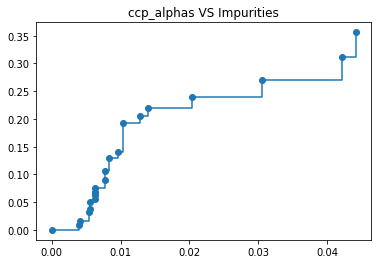

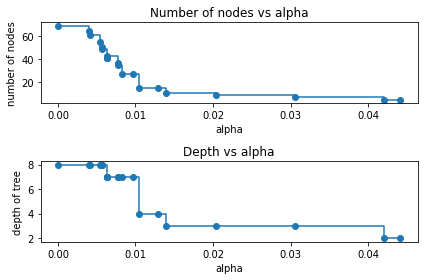

In [73]:
# post-pruning
clf = tree.DecisionTreeClassifier(splitter="best")
path = clf.cost_complexity_pruning_path(feature_train,target_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig,ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1],marker='o', drawstyle="steps-post")
ax.set_title('ccp_alphas VS Impurities')

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(splitter="best", ccp_alpha=ccp_alpha)
    clf.fit(feature_train, target_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1] # dorop the last ccp as it only contians one node!
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.savefig('Depth vs alpha')

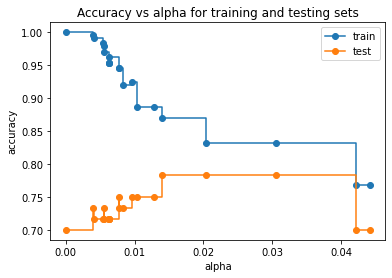

[0.         0.00399734 0.00413668 0.00544728 0.00562588 0.00562588
 0.00632911 0.00632911 0.00632911 0.00632911 0.0076991  0.00776755
 0.00825376 0.00964436 0.01041825 0.01285915 0.01392405 0.02038641
 0.03058761 0.04208711 0.04417964]


In [74]:
# Accuracy
train_scores = [clf.score(feature_train, target_train) for clf in clfs]
test_scores = [clf.score(feature_test, target_test) for clf in clfs]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('Accuracy vs alpha for training and testing sets')
plt.show()
clf = clfs[9]
print(ccp_alphas)


In [75]:
# Plot the post-pruning DT
clf = clfs[-5]
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
graph
graph.format = 'png'
graph.render('test-output/DT_postpuring.gv', view=True)  
print('Feature importance:',clf.feature_importances_)
print('Accuracy:',clf.score(feature_test, target_test))

Feature importance: [0.         0.         0.51080915 0.         0.         0.
 0.         0.         0.         0.         0.         0.23014386
 0.25904698]
Accuracy: 0.7833333333333333


# Random Forest


In [76]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=20,criterion='gini', max_features = 4 )
clf = clf.fit(feature_train, target_train)
predited_result = clf.predict(feature_test)
# dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,  special_characters=True) 
for tree_in_forest in clf.estimators_:
  dot_data = tree.export_graphviz(tree_in_forest, filled=True,rounded=True)
  graph = graphviz.Source(dot_data) 
  graph
  graph.format = 'png'
  graph.render('test-output/'+str(datetime.now())+'RandomForest.gv', view=True)
print('Feature importance:',clf.feature_importances_)
print('Accuracy:',clf.score(feature_test, target_test))


Feature importance: [0.07192323 0.02768178 0.12324341 0.05791272 0.09086117 0.00632377
 0.01434515 0.12928214 0.05654329 0.09149003 0.04442485 0.14011486
 0.14585362]
Accuracy: 0.75


Max feature: 1  achieves: 0.7833333333333333
Max feature: 2  achieves: 0.7666666666666667
Max feature: 3  achieves: 0.7833333333333333
Max feature: 4  achieves: 0.7833333333333333
Max feature: 5  achieves: 0.7833333333333333
Max feature: 6  achieves: 0.7833333333333333
Max feature: 7  achieves: 0.7833333333333333
Max feature: 8  achieves: 0.7833333333333333
Max feature: 9  achieves: 0.7666666666666667
Max feature: 10  achieves: 0.7833333333333333
Max feature: 11  achieves: 0.7666666666666667
Max feature: 12  achieves: 0.7833333333333333


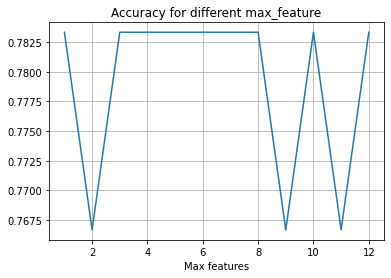

In [77]:
# Random Forest Classifier changing parameter
features = np.array(np.arange(1,13))
clfs =[]
accuracy_record = []
for feature in features:
  clf = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_features = feature)
  clf = clf.fit(feature_train, target_train)
  predited_result = clf.score(feature_test,target_test)
  clfs.append(clf)
  accuracy_record.append(predited_result)
  print('Max feature:',feature,' achieves:',predited_result)
fig, ax = plt.subplots()
ax.plot(features,accuracy_record)
ax.set_title('Accuracy for different max_feature')
ax.set_xlabel('Max features')
ax.set_label('Accuracy')
ax.grid(True)
plt.savefig('RF_Accuracy')

# MLP

In [78]:
# scale dataa
scaler = StandardScaler()
scaler.fit(feature_train)  
feature_train = scaler.transform(feature_train)
feature_test = scaler.transform(feature_test)
feature_test[1]

array([-0.09292341,  0.68041382, -0.19960414,  0.99446746, -0.31606617,
       -0.43011626,  0.98123015,  0.67559163, -0.71383061,  0.4529098 ,
       -0.97525191, -0.75830919,  1.15664042])

In [79]:
#ANN 4 hiden layer
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50,50), max_iter=5000, alpha=0.001,
                    solver='lbfgs',activation='logistic',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp.fit(feature_train, target_train)

mlp.predict(feature_test)
print(mlp.score(feature_test,target_test))


0.6333333333333333


In [80]:
#ANN 
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=5000, alpha=0.001,
                    solver='lbfgs',activation='logistic',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp.fit(feature_train, target_train)

mlp.predict(feature_test)
print(mlp.score(feature_test,target_test))


0.7333333333333333


In [81]:
# Search for optimal result
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
parameters = {'alpha': 10.0 ** -np.arange(0, 4), 'hidden_layer_sizes':np.arange(1, 20)*5} 

clf = GridSearchCV(MLPClassifier(max_iter=5000,solver='lbfgs'),parameters, n_jobs=-1)
clf.fit(feature_train,target_train)
print(clf.best_params_)
print(clf.best_score_)




{'alpha': 0.1, 'hidden_layer_sizes': 5}
0.8311170212765957


Accuracy of using  10 neurons in the hidden layer:  0.7833333333333333
Accuracy of using  50 neurons in the hidden layer:  0.7833333333333333
Accuracy of using  100 neurons in the hidden layer:  0.7833333333333333
Accuracy of using  200 neurons in the hidden layer:  0.7666666666666667
Accuracy of using  300 neurons in the hidden layer:  0.7666666666666667
Accuracy of using  1.0 L2 regulation:  0.7833333333333333
Accuracy of using  0.1 L2 regulation:  0.7666666666666667
Accuracy of using  0.01 L2 regulation:  0.7666666666666667
Accuracy of using  0.001 L2 regulation:  0.7666666666666667
Accuracy of using  0.0001 L2 regulation:  0.7833333333333333
Accuracy of using  0.0005 L2 regulation:  0.7833333333333333
Accuracy of using  identity Activation function:  0.7833333333333333
Accuracy of using  logistic Activation function:  0.7666666666666667
Accuracy of using  tanh Activation function:  0.7333333333333333
Accuracy of using  relu Activation function:  0.75


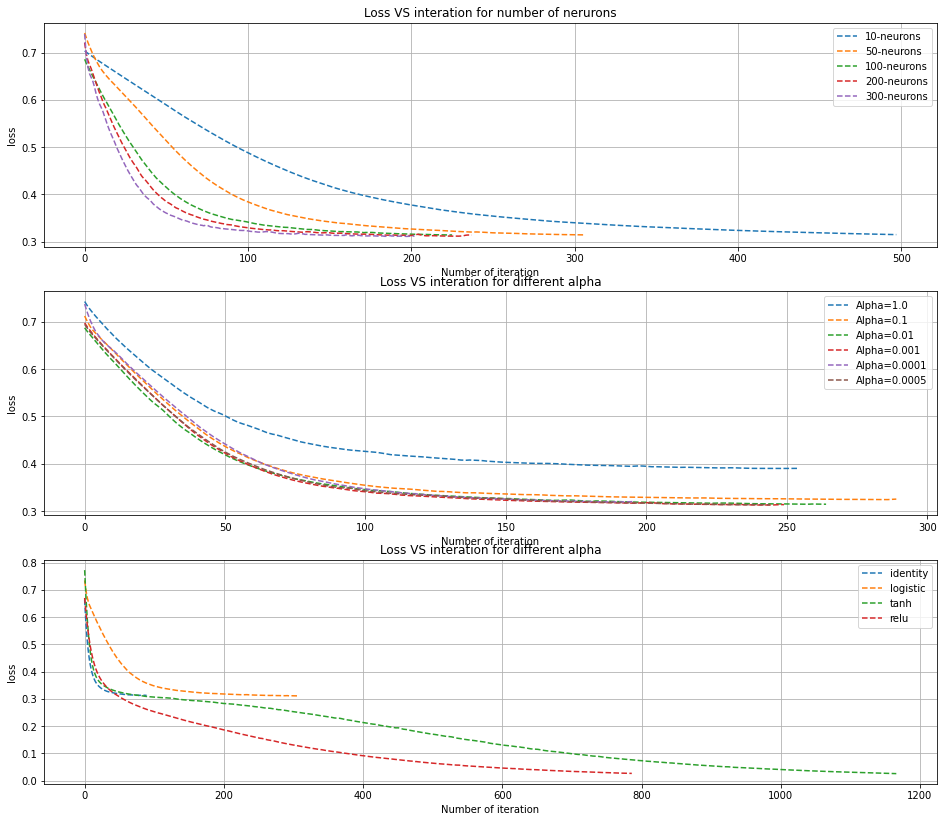

In [82]:
hidenlayers = np.array([10,50,100,200,300])
alphas = np.array([1, 1e-1, 1e-2, 1e-3,1e-4, 5e-4])
solvers = ['sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
fig, axs = plt.subplots(3,1,figsize=(16,14))
mlps=[]
for hidenlayer in hidenlayers:
  mlp = MLPClassifier(hidden_layer_sizes=(hidenlayer), max_iter=5000, alpha=1e-4,activation='logistic',solver='adam',learning_rate_init=.001,learning_rate='adaptive')
  mlp.fit(feature_train,target_train)
  mlps.append(mlp)
  print("Accuracy of using ",hidenlayer, "neurons in the hidden layer: ",mlp.score(feature_test,target_test))
  axs[0].plot(mlp.loss_curve_,'--', label=str(hidenlayer)+'-neurons')
 
axs[0].grid('True')
axs[0].legend()
axs[0].set_xlabel("Number of iteration")
axs[0].set_ylabel("loss")
axs[0].set_title('Loss VS interation for number of nerurons')

# alpha
for a in alphas:
  mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=5000, alpha=a,activation='logistic',solver='adam',learning_rate_init=.001,learning_rate='adaptive')
  mlp.fit(feature_train,target_train)
  mlps.append(mlp)
  print("Accuracy of using ",a, "L2 regulation: ",mlp.score(feature_test,target_test))
  axs[1].plot(mlp.loss_curve_,'--', label='Alpha='+str(a))
axs[1].grid('True')
axs[1].legend()
axs[1].set_xlabel("Number of iteration")
axs[1].set_ylabel("loss")
axs[1].set_title('Loss VS interation for different alpha')
plt.savefig('loss')

# activation
for a in activations:
  mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=5000, alpha=0.001,activation=a,solver='adam',learning_rate_init=.001,learning_rate='adaptive')
  mlp.fit(feature_train,target_train)
  mlps.append(mlp)
  print("Accuracy of using ",a, "Activation function: ",mlp.score(feature_test,target_test))
  axs[2].plot(mlp.loss_curve_,'--', label=a)
axs[2].grid('True')
axs[2].legend()
axs[2].set_xlabel("Number of iteration")
axs[2].set_ylabel("loss")
axs[2].set_title('Loss VS interation for different alpha')
plt.savefig('loss')


plt.savefig('Loss VS number of iteration in different configurations')

# Custom Problem


In [17]:
df_pd = pd.read_csv('ovariancancer.csv', header=0)
df_pd.head(3)

train_feature,test_feature,train_label,test_label = train_test_split(df_pd.loc[:, df_pd.columns !='Group_p'], df_pd.Group_p, test_size=0.2,shuffle=True)
df_pd.head()

,obs1,obs2,obs3,obs4,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15,obs16,obs17,obs18,obs19,obs20,obs21,obs22,obs23,obs24,obs25,obs26,obs27,obs28,obs29,obs30,obs31,obs32,obs33,obs34,obs35,obs36,obs37,obs38,obs39,obs40,...,obs3962,obs3963,obs3964,obs3965,obs3966,obs3967,obs3968,obs3969,obs3970,obs3971,obs3972,obs3973,obs3974,obs3975,obs3976,obs3977,obs3978,obs3979,obs3980,obs3981,obs3982,obs3983,obs3984,obs3985,obs3986,obs3987,obs3988,obs3989,obs3990,obs3991,obs3992,obs3993,obs3994,obs3995,obs3996,obs3997,obs3998,obs3999,obs4000,Group_p
0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,0.063100,0.024787,0.034473,0.033539,0.010430,0.018585,0.051385,0.045839,0.029080,0.079736,0.089912,0.065380,0.048052,0.017063,0.016695,0.013443,0.016502,0.061453,0.085336,0.069497,0.063938,0.045307,0.065024,0.066515,0.023628,0.016413,0.030908,0.033744,0.067682,0.051679,0.039370,0.041441,...,0.024769,0.037324,0.036717,0.037926,0.025362,0.032274,0.037402,0.021708,0.042619,0.038659,0.011192,0.026881,0.031891,0.016852,0.019141,0.027912,0.027902,0.033542,0.025730,0.014050,0.024751,0.023412,0.026159,0.031684,0.051812,0.039444,0.029653,0.016242,0.034250,0.035119,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,1
1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,0.032455,0.034368,0.042081,0.033586,0.030505,0.050972,0.053383,0.035885,0.066366,0.055495,0.076589,0.080017,0.075061,0.004252,0.017495,0.038238,0.073359,0.073178,0.062055,0.086377,0.101340,0.052906,0.039469,0.042734,0.040194,0.058838,0.058603,0.057568,0.061537,0.053980,...,0.016628,0.031519,0.047875,0.025434,0.034070,0.025602,0.037460,0.033488,0.030642,0.025165,0.044019,0.042104,0.035007,0.035176,0.042768,0.058703,0.032367,0.025872,0.026980,0.058895,0.039463,0.034146,0.021493,0.038700,0.020309,0.016217,0.025837,0.015283,0.045615,0.050841,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,1
2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,0.043953,0.024141,0.010930,0.038279,0.071463,0.059207,0.030963,0.044256,0.075730,0.045168,0.075071,0.049938,0.039305,0.005464,0.002152,0.096269,0.131514,0.066757,0.049883,0.064774,0.095143,0.054669,0.052777,0.041424,0.048040,0.050780,0.066666,0.072161,0.056550,0.039086,...,0.064079,0.045542,0.014756,0.012011,0.024230,0.045105,0.057743,0.045916,0.052717,0.029586,0.032430,0.051928,0.023077,0.036005,0.035644,0.049772,0.044400,0.077083,0.036150,0.026258,0.028932,0.034548,0.051987,0.043067,0.062111,0.037874,0.037671,0.047287,0.033514,0.029078,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,1
3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,0.027187,0.015647,0.025171,0.061664,0.032871,0.051305,0.071834,0.054755,0.049099,0.053036,0.061483,0.035359,0.026448,0.026280,0.071219,0.062114,0.029927,0.038563,0.075586,0.104784,0.091811,0.068762,0.034298,0.048845,0.073375,0.057342,0.035106,0.062046,0.048893,0.072327,...,0.029384,0.021471,0.031242,0.010720,0.038452,0.079256,0.041359,0.043127,0.048530,0.029375,0.024244,0.056262,0.044267,0.014457,0.041844,0.072468,0.046834,0.026447,0.042812,0.045295,0.025028,0.062789,0.058185,0.042317,0.057081,0.016343,0.040650,0.023925,0.068970,0.054675,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,1
4,0.019846,-0.010577,-0.007505,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,0.038738,0.024333,0.052067,0.084740,0.063564,0.042516,0.025874,0.068577,0.051352,0.066713,0.045730,0.071513,0.052216,0.053669,0.030604,0.055215,0.083480,0.034515,0.041145,0.076578,0.087774,0.049457,0.060838,0.074425,0.044697,0.050821,0.032854,0.034468,0.068844,0.080823,...,0.021398,0.020906,0.008364,0.006254,0.059083,0.056491,0.025792,0.034017,0.029784,0.035282,0.025776,0.039863,0.026833,0.063622,0.024966,0.037191,0.037282,0.033952,0.045301,0.055604,0.015818,0.054390,0

In [21]:
# DT, default settings 
clf = tree.DecisionTreeClassifier(splitter="best",)
start = time.time()
clf = clf.fit(train_feature, train_label)
print("Training time:", {time.time() - start},"s")
# tree.plot_tree(clf) 
predited_result = clf.predict(test_feature)
print('Feature importance:',clf.feature_importances_)
print("Accuracy:",accuracy_score(test_label, predited_result))
dot_data = tree.export_graphviz(clf, out_file=None,label='all',filled=True, rounded=True,  special_characters=True,proportion=True) 
graph = graphviz.Source(dot_data) 
graph
graph.format = 'png'
graph.render('test-output/cp/DT_default.gv', view=True) 
feature_importances = clf.feature_importances_

Training time: {0.21773886680603027} s
Feature importance: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8863636363636364


CCP_ALPHA: 0.0 Training time: {0.21550393104553223} s
CCP_ALPHA: 0.011494252873563194 Training time: {0.2121279239654541} s
CCP_ALPHA: 0.01744186046511628 Training time: {0.21890711784362793} s
CCP_ALPHA: 0.018604651162790694 Training time: {0.23020601272583008} s
CCP_ALPHA: 0.022213612294976145 Training time: {0.21566247940063477} s
CCP_ALPHA: 0.022540250447227173 Training time: {0.21564173698425293} s
CCP_ALPHA: 0.04379153545481236 Training time: {0.2153005599975586} s
CCP_ALPHA: 0.05963029218843176 Training time: {0.21971416473388672} s
CCP_ALPHA: 0.2945485532255757 Training time: {0.22107386589050293} s
Number of nodes in the last tree is: 1 with ccp_alpha: 0.2945485532255757


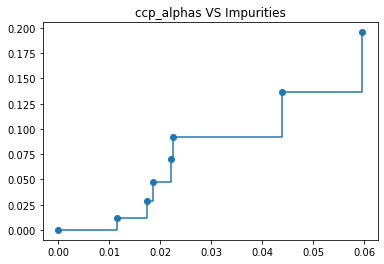

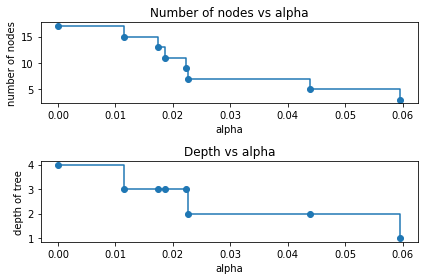

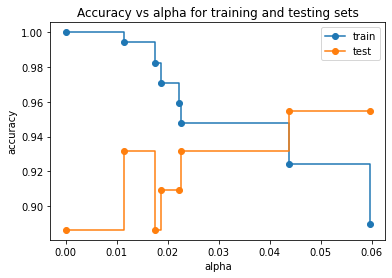

In [19]:
# post-pruning
clf = tree.DecisionTreeClassifier(splitter="best")
path = clf.cost_complexity_pruning_path(train_feature,train_label)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig,ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1],marker='o', drawstyle="steps-post")
ax.set_title('ccp_alphas VS Impurities')

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(splitter="best", ccp_alpha=ccp_alpha)
    start = time.time()
    clf.fit(train_feature,train_label)
    print("CCP_ALPHA:",ccp_alpha, "Training time:", {time.time() - start},"s")
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1] # dorop the last ccp as it only contians one node!
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.savefig('Depth vs alpha')

# Accuracy
train_scores = [clf.score(train_feature,train_label) for clf in clfs]
test_scores = [clf.score(test_feature, test_label) for clf in clfs]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('Accuracy vs alpha for training and testing sets')
plt.show()



In [86]:
clf = clfs[-4]
feature_importances = clf.feature_importances_

# Random Forest

Feature importance: [0.         0.00110787 0.         ... 0.         0.         0.        ]
Accuracy: 0.9318181818181818
Max feature: 5  achieves: 0.9772727272727273 Training time: {0.9866678714752197} s
Max feature: 10  achieves: 0.9545454545454546 Training time: {1.099219799041748} s
Max feature: 15  achieves: 0.9772727272727273 Training time: {1.2674469947814941} s
Max feature: 20  achieves: 1.0 Training time: {1.4275403022766113} s
Max feature: 25  achieves: 0.9772727272727273 Training time: {1.5782217979431152} s
Max feature: 30  achieves: 0.9772727272727273 Training time: {1.7484240531921387} s
Max feature: 35  achieves: 0.9772727272727273 Training time: {1.8787281513214111} s
Max feature: 40  achieves: 0.9772727272727273 Training time: {2.0327069759368896} s
Max feature: 45  achieves: 0.9772727272727273 Training time: {2.213416337966919} s
Max feature: 50  achieves: 0.9772727272727273 Training time: {2.3626649379730225} s
Max feature: 55  achieves: 0.9772727272727273 Training ti

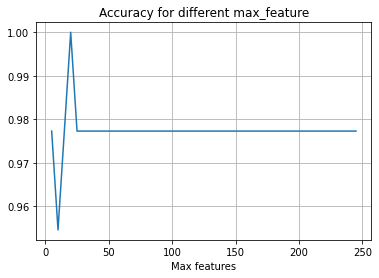

In [25]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=20,criterion='gini', max_features = 65)
clf = clf.fit(train_feature, train_label)
predited_result = clf.predict(test_feature)
# dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,  special_characters=True) 
for tree_in_forest in clf.estimators_:
  dot_data = tree.export_graphviz(tree_in_forest, filled=True,rounded=True)
  graph = graphviz.Source(dot_data) 
  graph
  graph.format = 'png'
  graph.render('test-output/cp/'+str(datetime.now())+'RandonForest.gv', view=True)  
print('Feature importance:',clf.feature_importances_)
print('Accuracy:',clf.score(test_feature, test_label))


# Random Forest Classifier changing parameter
features = np.array(np.arange(1,50)*5)
clfs =[]
accuracy_record = []
for feature in features:
  clf = RandomForestClassifier(n_estimators=500,criterion='entropy', max_features = feature)
  start = time.time()
  clf = clf.fit(train_feature, train_label)
  predited_result = clf.score(test_feature,test_label)
  accuracy_record.append(predited_result)
  print('Max feature:',feature,' achieves:',predited_result,"Training time:", {time.time() - start},"s")
  clfs.append(clf)
fig, ax = plt.subplots()
ax.plot(features,accuracy_record)
ax.set_title('Accuracy for different max_feature')
ax.set_xlabel('Max features')
ax.set_label('Accuracy')
ax.grid(True)
plt.savefig('RF_Accuracy')

Max feature: 245  achieves: 0.9772727272727273 Training time: {222.60943388938904} s


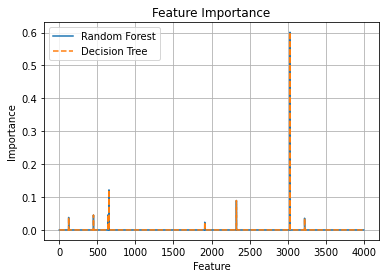

In [24]:
clf2 = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_features = 60)
clf2 = clf.fit(train_feature, train_label)
predited_result = clf2.score(test_feature,test_label)
accuracy_record.append(predited_result)
print('Max feature:',feature,' achieves:',predited_result,"Training time:", {time.time() - start},"s")
fig, axs = plt.subplots()

axs.plot(clf.feature_importances_, label='Random Forest')
axs.plot(clf2.feature_importances_,'--', label='Decision Tree')
axs.grid('True')
axs.legend()
axs.set_xlabel("Feature")
axs.set_ylabel("Importance")
axs.set_title('Feature Importance')
plt.show
feature_importances = clf2.feature_importances_


## ANN

In [5]:
# scale dataa
scaler = StandardScaler()
scaler.fit(train_feature)  
train_feature = scaler.transform(train_feature)
test_feature = scaler.transform(test_feature)
test_feature[1]

array([0.5484603 , 1.01805436, 0.23496171, ..., 0.89821518, 2.09260532,
       0.1764879 ])

Training time: {2.8151257038116455} s


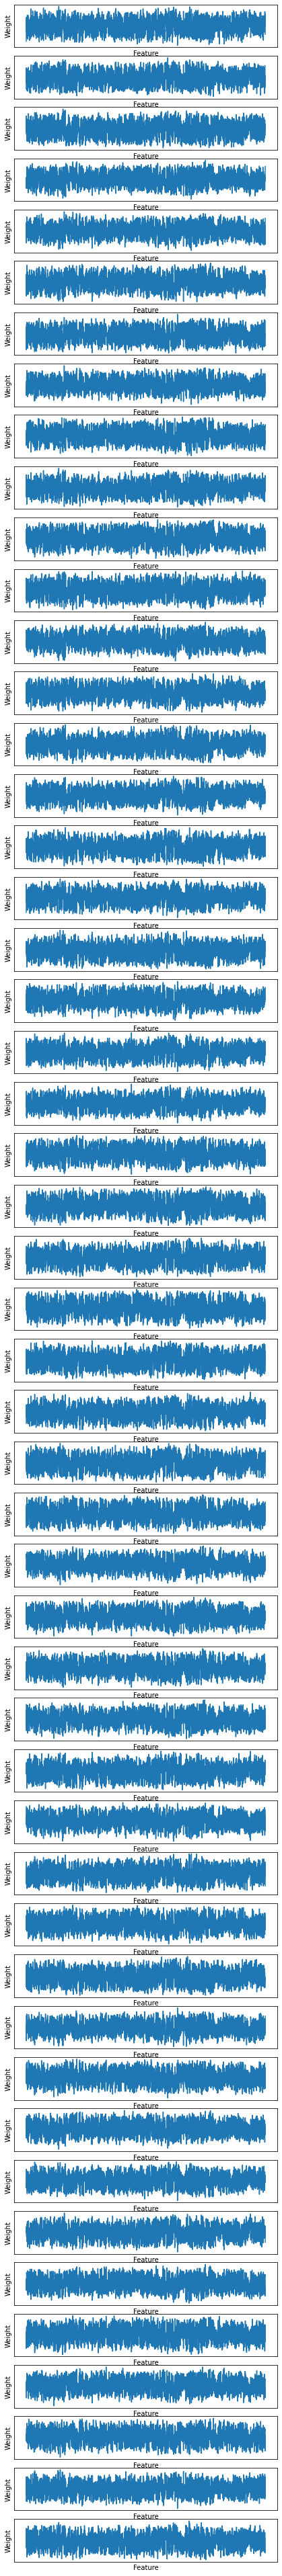

0.9318181818181818


In [90]:
#ANN 
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, alpha=0.001,
                    solver='adam',activation='logistic',
                    learning_rate_init=0.001, learning_rate='adaptive')
start = time.time()
mlp.fit(train_feature, train_label)
print("Training time:", {time.time() - start},"s")

fig, axes = plt.subplots(50, 1,figsize=(7,70))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.plot(coef)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel('Feature')
    ax.set_ylabel('Weight')
plt.show()
print(mlp.score(test_feature,test_label))




Accuracy of using  2 neurons in the hidden layer:  0.8409090909090909 Training time: {0.16831088066101074} s
Accuracy of using  10 neurons in the hidden layer:  1.0 Training time: {0.18376445770263672} s
Accuracy of using  50 neurons in the hidden layer:  0.9545454545454546 Training time: {0.23693442344665527} s
Accuracy of using  100 neurons in the hidden layer:  1.0 Training time: {0.5748279094696045} s
Accuracy of using  1000 neurons in the hidden layer:  1.0 Training time: {4.952973127365112} s
Accuracy of using  2000 neurons in the hidden layer:  0.9090909090909091 Training time: {7.242030620574951} s
Accuracy of using  4000 neurons in the hidden layer:  0.9318181818181818 Training time: {17.432501554489136} s
Accuracy of using  10000 neurons in the hidden layer:  0.9772727272727273 Training time: {22.988820791244507} s
Accuracy of using  1.0 L2 regulation:  0.8863636363636364 Training time: {2.534721851348877} s
Accuracy of using  0.1 L2 regulation:  0.9545454545454546 Training t

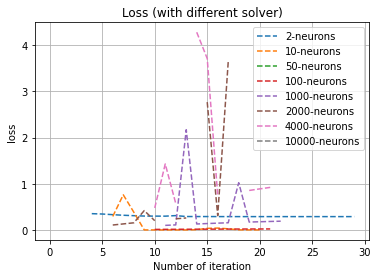

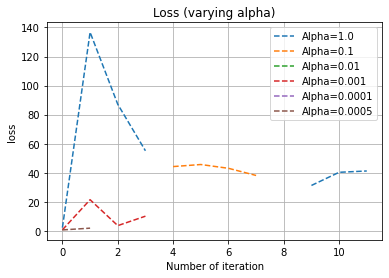

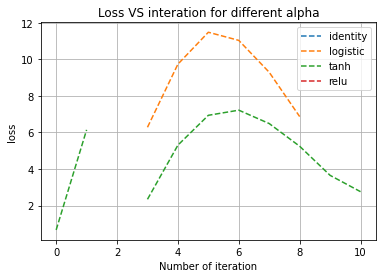

In [10]:
hidenlayers = np.array([2, 10, 50, 100, 1000, 2000, 4000, 10000])
alphas = np.array([1, 1e-1, 1e-2, 1e-3,1e-4, 5e-4])
solvers = ['sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
fig, axs = plt.subplots()
# Testing layer nodes
mlps=[]
for hidenlayer in hidenlayers:
  mlp = MLPClassifier(hidden_layer_sizes=(hidenlayer), max_iter=5000, alpha=1e-4,activation='relu',solver='adam',learning_rate_init=.1,learning_rate='adaptive')
  start = time.time()
  mlp.fit(train_feature,train_label)

  print("Accuracy of using ",hidenlayer, "neurons in the hidden layer: ",mlp.score(test_feature,test_label), "Training time:", {time.time() - start},"s")
  mlps.append(mlp)
  axs.plot(mlp.loss_curve_,'--', label=str(hidenlayer)+'-neurons')

axs.grid('True')
axs.legend()
axs.set_xlabel("Number of iteration")
axs.set_ylabel("loss")
axs.set_title('Loss (with different nodes)')
plt.savefig('Loss (with different nodes)')
# alpha
fig, axs = plt.subplots()
for a in alphas:
  mlp = MLPClassifier(hidden_layer_sizes=(1000), max_iter=5000, alpha=a,activation='logistic',solver='adam',learning_rate_init=.1,learning_rate='adaptive')
  start = time.time()
  mlp.fit(train_feature,train_label)
  print("Accuracy of using ",a, "L2 regulation: ",mlp.score(test_feature,test_label), "Training time:", {time.time() - start},"s")
  mlps.append(mlp)
  axs.plot(mlp.loss_curve_,'--', label='Alpha='+str(a))
axs.grid('True')
axs.legend()
axs.set_xlabel("Number of iteration")
axs.set_ylabel("loss")
axs.set_title('Loss (varying alpha)')
plt.savefig('Loss (varying alpha)')

# activation
fig, axs = plt.subplots()
for a in activations:
  mlp = MLPClassifier(hidden_layer_sizes=(1000), max_iter=5000, alpha=0.001,activation=a,solver='adam',learning_rate_init=.1,learning_rate='adaptive')
  start = time.time()
  mlp.fit(train_feature,train_label)
  start = time.time()
  print("Accuracy of using ",a, "Activation function: ",mlp.score(test_feature,test_label), "Training time:", {time.time() - start},"s")
  mlps.append(mlp)
  axs.plot(mlp.loss_curve_,'--', label=a)
axs.grid('True')
axs.legend()
axs.set_xlabel("Number of iteration")
axs.set_ylabel("loss")
axs.set_title('Loss VS interation for different alpha')
plt.savefig('Loss (with Activation function)')



In [13]:
# Perform gridsearch to find alpha
parameters = {'alpha': 10.0 ** -np.arange(0, 4)} 

clf = GridSearchCV(MLPClassifier(hidden_layer_sizes = 50,max_iter=5000,solver='adam'),parameters, n_jobs=-1)
clf.fit(train_feature,train_label)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1.0}
0.9594957983193277


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
